# Customer Life Time Value(CLV)

**The customer lifetime value (CLV) is a valuable metric that shows the total amount of money a business expects a customer to spend on products and services throughout the customer relationship.**


### Data Import and Preprocessing

In [210]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [211]:
#loading the data
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/OnlineRetail.xlsx"
df = pd.read_excel(file_name, sheet_name='Online Retail')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [212]:
df.shape

(541909, 8)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [214]:
# change the invoice_date format - String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')


In [215]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [216]:
df.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [217]:
# Sales column
df['Sales'] = df.Quantity * df.UnitPrice

In [218]:
df.head

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Custom

In [219]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
Sales               0
dtype: int64

In [220]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,14.94
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,4.30
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,3.87
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,4.73


In [221]:
# new_df without missing values
df2 = df.dropna()

In [222]:
df2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Sales          0
dtype: int64

In [223]:
# To check any duplicate rows
df2.duplicated().sum()

5225

In [224]:
#dropping those duplicate rows
df2.drop_duplicates(inplace=True)
df2.duplicated().sum()

0

### Basic Statistical Details and Visualization

In [226]:
# Statistical Details of numerical Columns
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,401604.0,12.183273,-80995.0,2.0,5.0,12.0,80995.0,250.283037
InvoiceDate,401604,2011-07-10 12:08:23.848567552,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-29 15:40:00,2011-10-20 11:58:30,2011-12-09 12:50:00,NaN
UnitPrice,401604.0,3.474064,0.0,1.25,1.95,3.75,38970.0,69.764035
CustomerID,401604.0,15281.160818,12346.0,13939.0,15145.0,16784.0,18287.0,1714.006089
Sales,401604.0,20.613638,-168469.6,4.25,11.7,19.8,168469.6,430.352218


In [227]:
# remove negative quanitites

df2 = df2[df2.Quantity > 0]

In [228]:
# string columns
str_cols= df2.select_dtypes("object").columns
print(str_cols)
df2[str_cols].describe().T

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')


,count,unique,top,freq
InvoiceNo,392732,18536,576339,542
StockCode,392732,3665,85123A,2023
Description,392732,3877,WHITE HANGING HEART T-LIGHT HOLDER,2016
Country,392732,37,United Kingdom,349227


In [229]:
# View our date range
print('Date Range: %s to %s' %(df2['InvoiceDate'].min(), df2['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [230]:
# Get a orders summary dataset that shows the total in sales made per customer invoice
order_df = df2.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum,'InvoiceDate': max})
order_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    579673       220.31 2011-11-30 12:59:00
           580872       208.00 2011-12-06 12:02:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[18536 rows x 2 columns]

## RFM Analysis:
* Recency: How recently a customer made a purchase.
* Frequency: How often a customer makes a purchase.
* Monetary: How much money a customer spends

### Using RFM to Estimate CLV:
* **Calculate RFM Scores:** Assign scores for Recency, Frequency, and Monetary value for each customer.
* **Segmentation:** Group customers based on their RFM scores. 
* **Predict CLV:** Use RFM scores as inputs in a regression or classification model to predict CLV.                                                                  
* **Actionable Insights:** Develop marketing strategies based on the predicted CLV, focusing on high-value customers.
                  

In [233]:
# Reference date (for calculating recency)
reference_date = df2['InvoiceDate'].max() + datetime.timedelta(days=1) # one day after the last invoice date
reference_date 

Timestamp('2011-12-10 12:50:00')

In [234]:
def rfm(df):
    # Recency
    recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
    recency_df['Recency'] = (reference_date - recency_df['InvoiceDate']).dt.days
    # Frequency
    frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
    frequency_df.columns = ['CustomerID', 'Frequency']
    #  Monetary value
    monetary_df = df.groupby('CustomerID')['Sales'].sum().reset_index()
    monetary_df.columns = ['CustomerID', 'Monetary']
    # Merge RFM metrics into one DataFrame
    rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')
    return rfm_df

In [235]:
#function_call
rfm_df=rfm(df2)
rfm_df

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,326,1,77183.60
1,12347.0,2011-12-07 15:52:00,2,7,4310.00
2,12348.0,2011-09-25 13:13:00,75,4,1797.24
3,12349.0,2011-11-21 09:51:00,19,1,1757.55
4,12350.0,2011-02-02 16:01:00,310,1,334.40
...,...,...,...,...,...
4334,18280.0,2011-03-07 09:52:00,278,1,180.60
4335,18281.0,2011-06-12 10:53:00,181,1,80.82
4336,18282.0,2011-12-02 11:43:00,8,2,178.05
4337,18283.0,2011-12-06 12:02:00,4,16,2045.53


In [236]:
# Scoring RFM (Simple quantile-based scoring)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=False) + 1
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, labels=False) + 1
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=False) + 1
rfm_df.head()

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346.0,2011-01-18 10:01:00,326,1,77183.60,5,1,5
1,12347.0,2011-12-07 15:52:00,2,7,4310.00,1,5,5
2,12348.0,2011-09-25 13:13:00,75,4,1797.24,4,4,4
3,12349.0,2011-11-21 09:51:00,19,1,1757.55,2,1,4
4,12350.0,2011-02-02 16:01:00,310,1,334.40,5,1,2


* Recency: Customers are scored from 1 to 5, where 1 represents the highest recency (most recent purchase), and 5 represents the lowest recency (least recent purchase).
* Frequency: Customers are scored from 1 to 5, where 1 represents the lowest frequency (fewest purchases), and 5 represents the highest frequency (most purchases).
* Monetary: Customers are scored from 1 to 5, where 1 represents the lowest monetary value (least spending), and 5 represents the highest monetary value (most spending).

In [300]:
# Combine RFM scores
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)
rfm_df

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,CLV_3M
0,12346.0,2011-01-18 10:01:00,326,1,77183.60,5,1,5,515,19295.9000
1,12347.0,2011-12-07 15:52:00,2,7,4310.00,1,5,5,155,1077.5000
2,12348.0,2011-09-25 13:13:00,75,4,1797.24,4,4,4,444,449.3100
3,12349.0,2011-11-21 09:51:00,19,1,1757.55,2,1,4,214,439.3875
4,12350.0,2011-02-02 16:01:00,310,1,334.40,5,1,2,512,83.6000
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,2011-03-07 09:52:00,278,1,180.60,5,2,1,521,45.1500
4335,18281.0,2011-06-12 10:53:00,181,1,80.82,5,2,1,521,20.2050
4336,18282.0,2011-12-02 11:43:00,8,2,178.05,1,3,1,131,44.5125
4337,18283.0,2011-12-06 12:02:00,4,16,2045.53,1,5,4,154,511.3825


## CLV Calculation


In [240]:
# Calculate CLV for 3 Months
# our df contains  dates that cover a one year period 
# 12 months = 1 year
# 3 months = 1/4 year
#clv= avg_monetary*frequency*clv_period
# avg_monetary= Total_monetary/frequency
#clv=Total_monetary*clv_period

rfm_df['CLV_3M'] = rfm_df['Monetary'] * (1/4)
rfm_df

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,CLV_3M
0,12346.0,2011-01-18 10:01:00,326,1,77183.60,5,1,5,515,19295.9000
1,12347.0,2011-12-07 15:52:00,2,7,4310.00,1,5,5,155,1077.5000
2,12348.0,2011-09-25 13:13:00,75,4,1797.24,4,4,4,444,449.3100
3,12349.0,2011-11-21 09:51:00,19,1,1757.55,2,1,4,214,439.3875
4,12350.0,2011-02-02 16:01:00,310,1,334.40,5,1,2,512,83.6000
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,2011-03-07 09:52:00,278,1,180.60,5,2,1,521,45.1500
4335,18281.0,2011-06-12 10:53:00,181,1,80.82,5,2,1,521,20.2050
4336,18282.0,2011-12-02 11:43:00,8,2,178.05,1,3,1,131,44.5125
4337,18283.0,2011-12-06 12:02:00,4,16,2045.53,1,5,4,154,511.3825


## Model Development and Evaluation

### Train-Test_split

In [243]:
# separate features and target var
x = rfm_df[['Recency', 'Frequency', 'Monetary']]  # Features / independent_var
y = rfm_df['CLV_3M']  # Target variable / dependent_var

In [244]:
#import library
from sklearn.model_selection import train_test_split

In [245]:
#split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=40) 

### Training Algorithm-LinearRegression

In [247]:
# import libraries
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [248]:
#Prediction
y_predict = lr_model.predict(x_test)

In [249]:
#comparing Actual data vs Predicted data
comp_df = pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_predict})
comp_df.head()

,Actual_data,Predicted_data
549,86.0000,86.0000
2114,304.8500,304.8500
4108,28.0675,28.0675
4174,79.5000,79.5000
3182,56.3950,56.3950


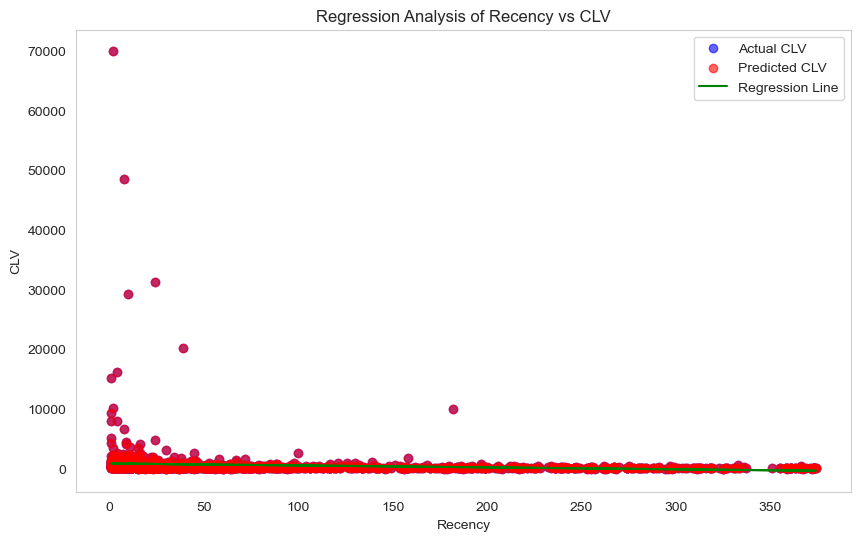

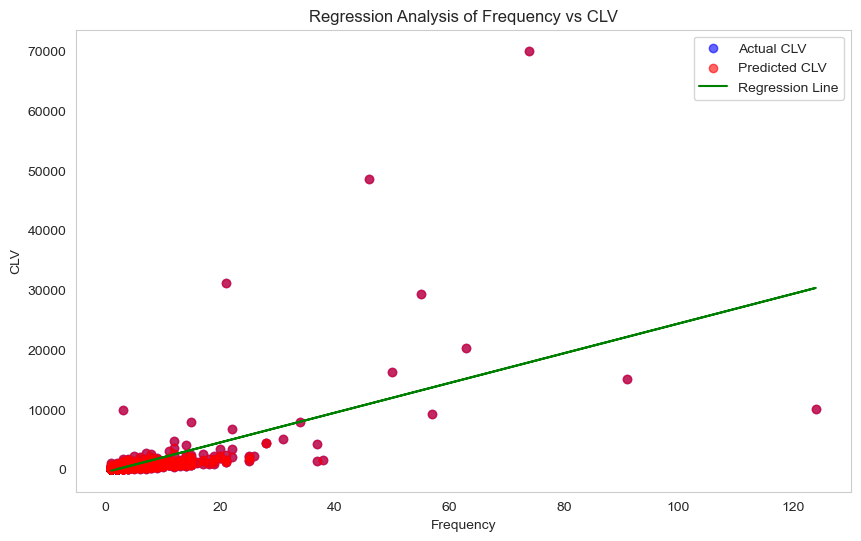

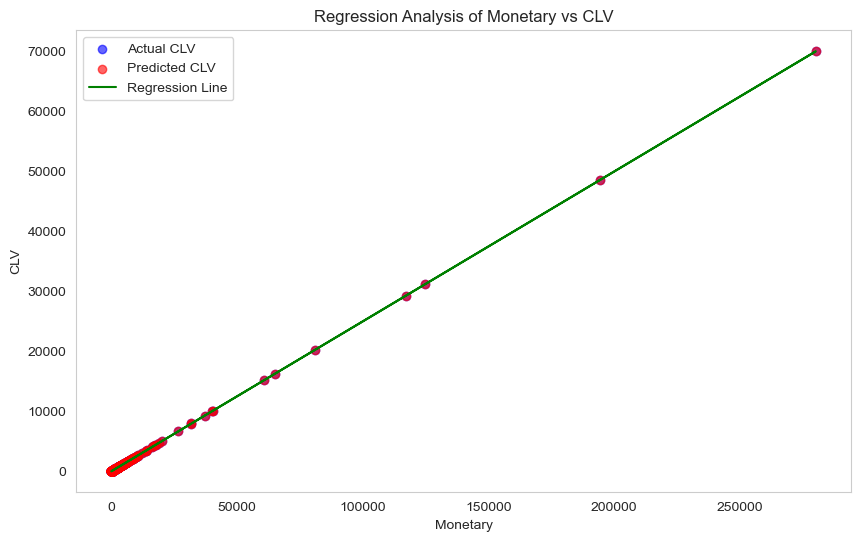

In [250]:
# Plot the predicted vs actual values
# Scatter Plot with Regression Line for each feature
features = ['Recency', 'Frequency', 'Monetary']
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(x_test[feature], y_test, color='blue', label='Actual CLV', alpha=0.6)
    plt.scatter(x_test[feature], y_predict, color='red', label='Predicted CLV', alpha=0.6)
    
    # Fit line
    slope, intercept = np.polyfit(x_test[feature], y_predict, 1)
    plt.plot(x_test[feature], slope * x_test[feature] + intercept, color='green', label='Regression Line')
    
    plt.title(f'Regression Analysis of {feature} vs CLV')
    plt.xlabel(feature)
    plt.ylabel('CLV')
    plt.legend()
    plt.grid()
    plt.show()

#### Evaluating the Model :

In [252]:
# MSE, RMSE, MAE and R*2 
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
lr_mse=mean_squared_error(y_test, y_predict)
lr_rmse=np.sqrt(lr_mse)
lr_mae=mean_absolute_error(y_test,y_predict)
lr_r2=r2_score(y_test,y_predict)
print('\n mean_squared_error:',lr_mse,'\n root_mean_squared_error:',lr_rmse,'\n mean_absolute error:',lr_mae,'\nr2_score:',lr_r2,'\n')


 mean_squared_error: 8.472597446379595e-24 
 root_mean_squared_error: 2.910772654533431e-12 
 mean_absolute error: 6.685243756426336e-13 
r2_score: 1.0 



### Sample Data to lr_Model

In [318]:
#  Generate random indices based on the DataFrame length
num_samples = 5  # Change this based on how many samples you want
rand_indices = np.random.choice(rfm_df.index, size=num_samples, replace=False)
#  Safely access the sampled data
test_sample = rfm_df.loc[rand_indices]
#test_sample

In [316]:
features = ['Recency', 'Frequency', 'Monetary']
output=lr_model.predict(test_sample[features])
test_sample['Predicted_CLV_3M']=output
test_sample

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,CLV_3M,Predicted_CLV_3M
4330,18274.0,2011-11-09 17:03:00,30,1,175.92,2,2,1,221,43.9800,43.9800
1238,14027.0,2011-10-10 09:01:00,61,1,104.82,3,1,1,311,26.2050,26.2050
3187,16698.0,2011-04-27 10:52:00,227,2,1998.00,5,3,4,534,499.5000,499.5000
4083,17934.0,2011-10-19 11:16:00,52,2,704.25,3,3,3,333,176.0625,176.0625
909,13564.0,2011-07-18 14:33:00,144,3,1724.67,4,3,4,434,431.1675,431.1675
